## 随机变量X的含义  
随机变量是表示随机现象各种结果的变量，我们关注的是随机过程映射到数值的函数    
例如，我们可以定义X为n次抛硬币后正面的次数，那么可以定义X=3为n次抛硬币后，出现3次正面的次数，则可以定义P(X=3)为n次抛硬币后出现3次正面的概率

## 概率密度函数
### 二项分布  
 
**二项分布公式**  
服从二项分布的随机变量X表示在N个独立的是/非试验中成功的次数，其中每次试验的成功概率为p。
$$
P(X=k) = \frac{N!}{k!(N-k)!}p^k(1-p)^{N-k}
$$
N:总体数目  
k:事件k  
p:事件k独立抽样的概率

In [2]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

N = 10
k = np.arange(N+1)
p = 0.1
binomial = ss.binom.pmf(k,N,p)
print(binomial)

[  3.48678440e-01   3.87420489e-01   1.93710245e-01   5.73956280e-02
   1.11602610e-02   1.48803480e-03   1.37781000e-04   8.74800000e-06
   3.64500000e-07   9.00000000e-09   1.00000000e-10]


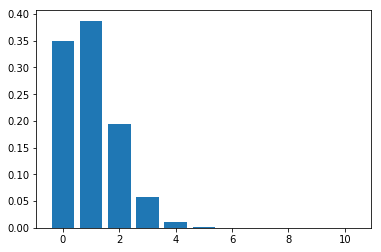

In [3]:
plt.bar(k,binomial)
plt.show()

In [4]:
#概率质量/密度函数
np.sum(binomial)

1.0000000000000004

### 期望值E(X)    
随机变量的期望值其实就是总体的均值，在实际情况下，我们往往拿不到总体，则需要通过样本期望值求总体的均值  
**求和（数字出现的频率*对应的数字）**    
二项分布的期望值公式
$$
E(X) = \sum_{k=0}^NP(X=k)*X = Np
$$
**N为试验次数**  
注意：期望值不等于可能性最大的那个值，但在二项分布中可以这么理解  


In [5]:
ex = np.sum(binomial*k)
ex

1.0000000000000009

### 泊松分布  
泊松分布适合于描述单位时间（或空间）内随机事件发生的次数。如某一服务设施在一定时间内到达的人数，电话交换机接到呼叫的次数，汽车站台的候客人数，机器出现的故障数，自然灾害发生的次数，一块产品上的缺陷数，显微镜下单位分区内的细菌分布数等等。  
基础极限函数
$$
\lim_{x \rightarrow \infty}(1+\frac{a}{x})^x = e^a
$$
**泊松分布概率函数**
$$
P(X=k) = \frac{\lambda^k}{k!}e^{-\lambda}
$$
$\lambda$:单位时间内发生事件的平均值

In [9]:
rate = 2
k = np.arange(0,10)
y = ss.poisson.pmf(k,rate)
y

array([  1.35335283e-01,   2.70670566e-01,   2.70670566e-01,
         1.80447044e-01,   9.02235222e-02,   3.60894089e-02,
         1.20298030e-02,   3.43708656e-03,   8.59271640e-04,
         1.90949253e-04])

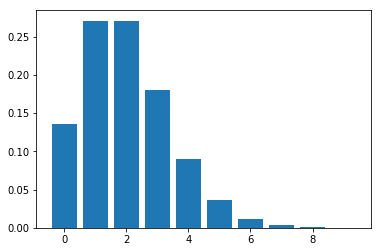

In [10]:
plt.bar(k,y)
plt.show()

In [11]:
np.sum(y)

0.99995350192498278

### 正态分布
**正态分布概率密度函数**
$$
p(X=x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$
$\sigma$:标准差  
$\mu$:E(X) 
  
    
扩展  
- 二项分布的试验次数趋于无穷时，其概率密度值收敛于正态分布函数  
- 标准正态分布为$\mu = 0$，$\sigma = 1$的正态分布  
  
**注意：对于连续分布密度函数，其高度没有意义，面积才有意义，真正要考虑的是概率密度曲线下的积分面积,例如，要求下雨为4.5厘米到5.5厘米的概率**
$$
\int_{4.5}^{5.5}p(x)dx
$$

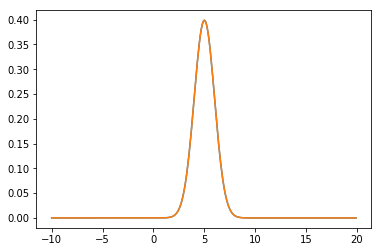

In [40]:
mu = 5
sigma = 1
x = np.arange(-10,20,0.1)
y = ss.norm.pdf(x, loc = mu, scale = sigma)
plt.plot(x,y)
plt.show()

In [34]:
ss.norm.cdf(5,loc=mu, scale=sigma)

0.5

In [38]:
def calArea(x1,x2,mu,sigma):
    return ss.norm.cdf(x1,loc=mu,scale=sigma)-ss.norm.cdf(x2,loc=mu,scale=sigma)

print(calArea(5.5,4.5,mu,sigma))
print(calArea(mu+sigma,mu-sigma,mu,sigma))

0.382924922548
0.682689492137
